In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

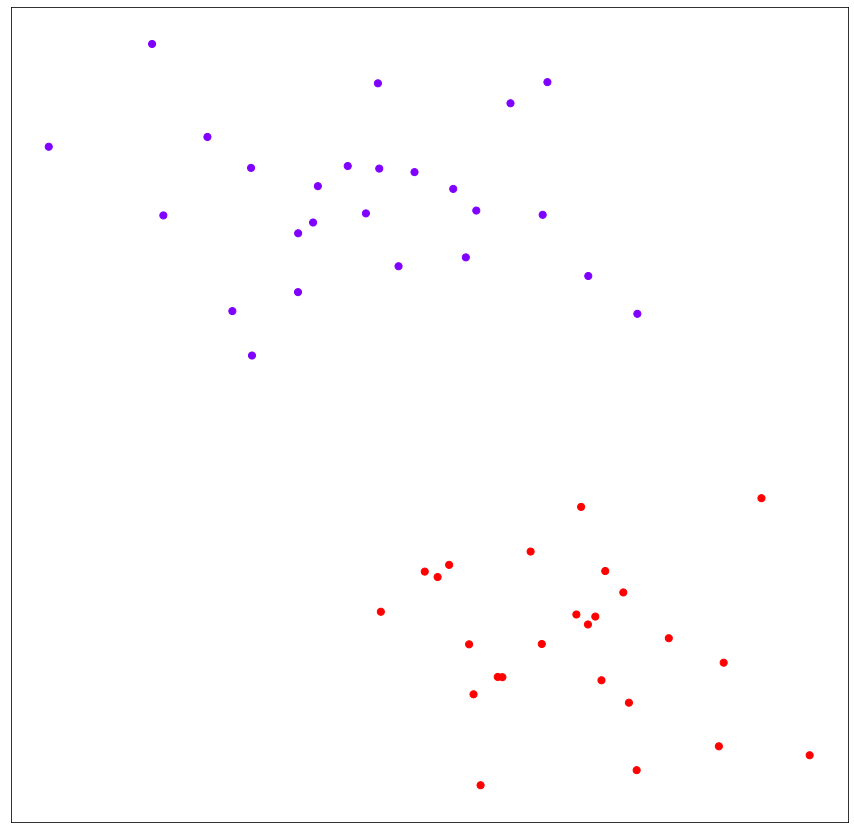

In [2]:
#实例化数据集,可视化数据集。
X,Y=make_blobs(n_samples=50,n_features=2,centers=2,random_state=0,cluster_std=0.6)
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

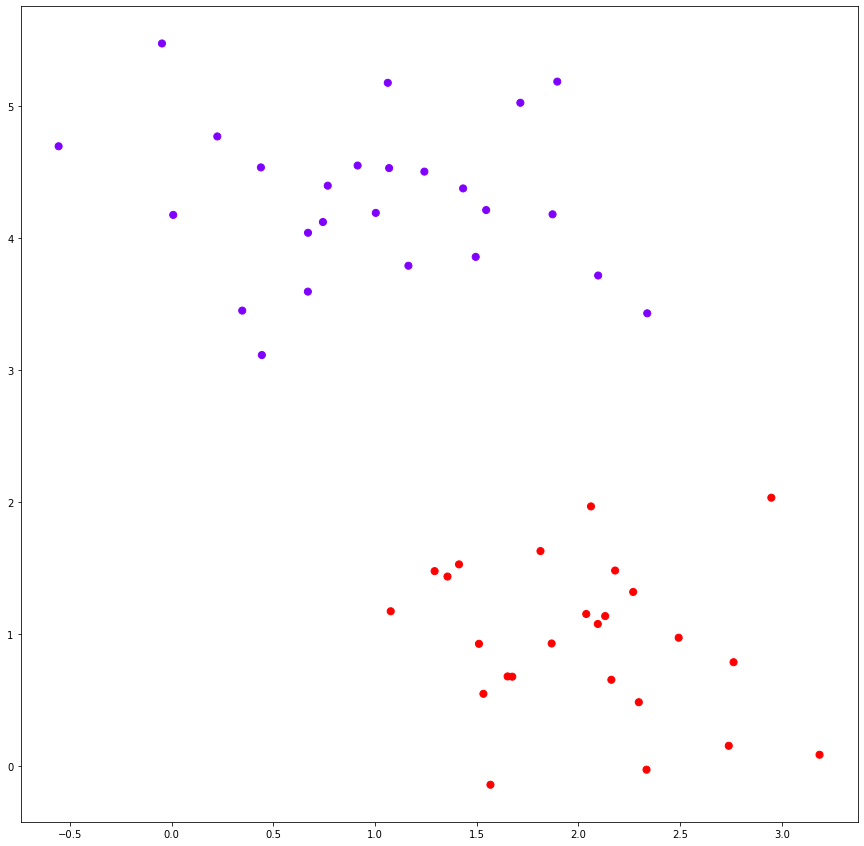

In [3]:
# 画决策边界，使用contour函数（等高线函数）
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
ax=plt.gca()

In [4]:
#获取两条坐标轴上的最大值和最小值
xlim=ax.get_xlim()
ylim=ax.get_ylim()

In [7]:
ylim

(-0.41872382476349596, 5.754870487889891)

In [5]:
# 在最大值和最小值之间形成30个规律的数据
axisx=np.linspace(xlim[0],xlim[1],30)
axisy=np.linspace(ylim[0],ylim[1],30)
#使用meshgrid来画表格
axisy,axisx=np.meshgrid(axisy,axisx)

In [48]:
axisx.shape

(30, 30)

In [49]:
xy=np.vstack([axisx.ravel(),axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

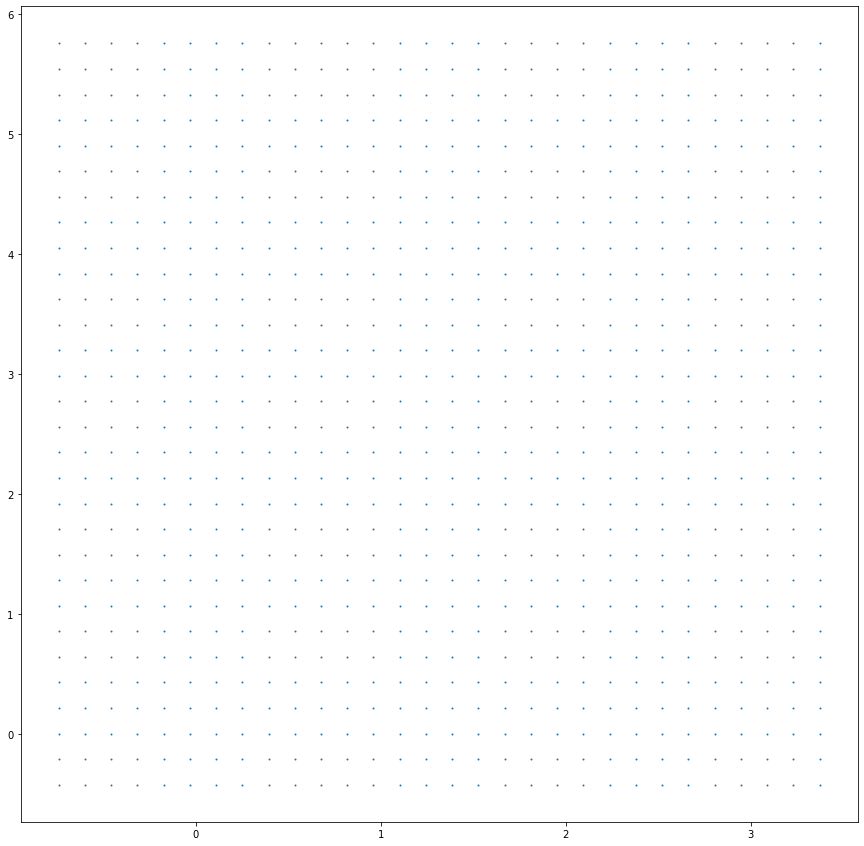

In [50]:
plt.figure(figsize=(15,15))
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

In [51]:
#理解函数meshgrid和vstack
a=np.array([1,2,3])
b=np.array([7,8])
v1,v2=np.meshgrid(a,b)

In [52]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [53]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [54]:
V=np.vstack([v1.ravel(),v2.ravel()]).T

In [55]:
V

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [56]:
# 建模，计算决策边界并找出网格上每个点到决策边界的距离  
clf=SVC(kernel="linear").fit(X,Y)
Z=clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

(-0.41872382476349596, 5.754870487889891)

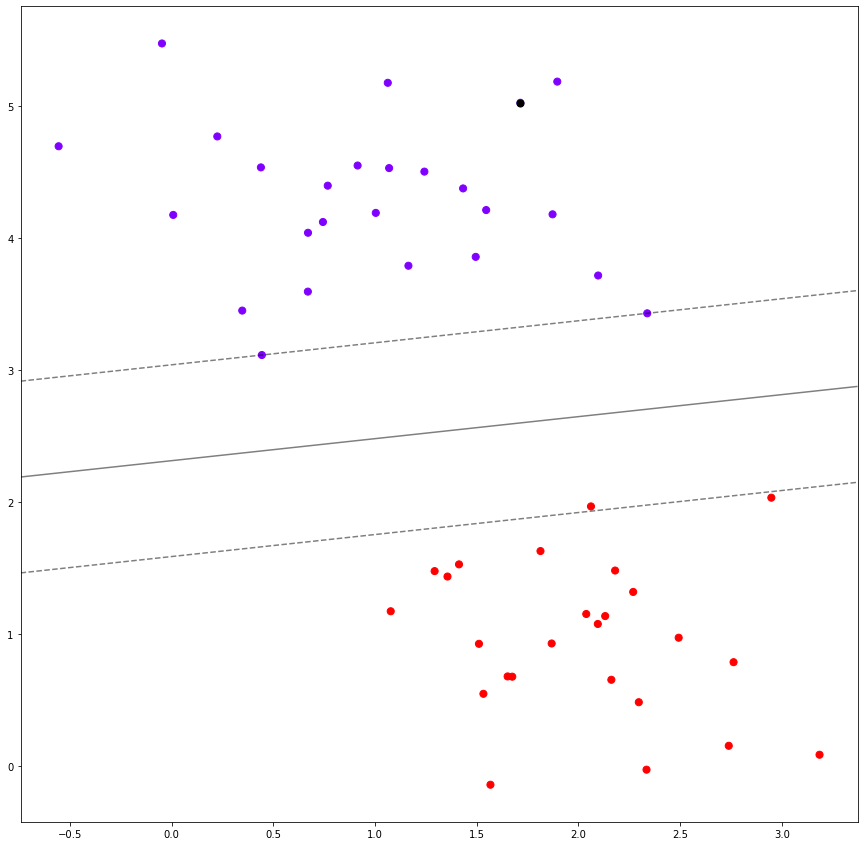

In [62]:
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")
ax=plt.gca()
ax.contour(axisx
           ,axisy
           ,Z
           ,colors="k"
           ,levels=[-1,0,1]#画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

E:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
  del sys.path[0]


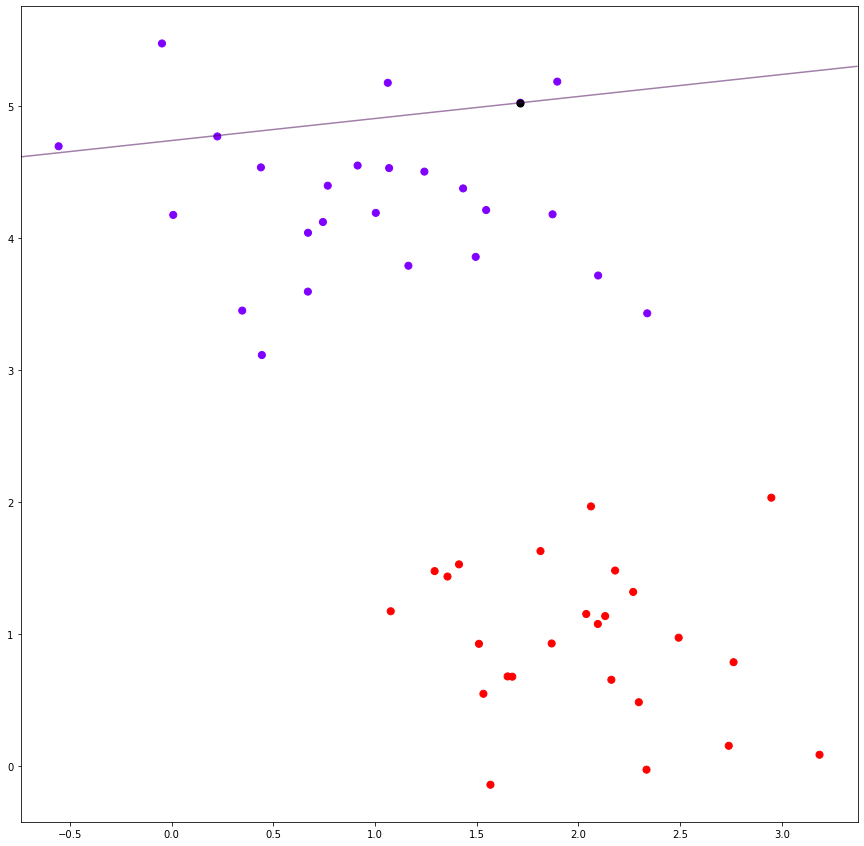

In [67]:
#查看X[10]这个点在图中的位置，画一条经过这个点的决策边界
plt.figure(figsize=(15,15))
clf.decision_function(X[10].reshape(1,2))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")
ax=plt.gca()
ax.contour(axisx
           ,axisy
           ,Z
           ,color="k"
           ,levels=[-3.33917354]
           ,alpha=0.5
           ,linestyle=["--"])

In [63]:
X[10].shape

(2,)

In [74]:
# 对整个绘图过程包装成函数
def plot_svm_decision_function(model,level,linestyle,ax=None):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    x,y=np.meshgrid(x,y)
    xy=np.vstack([x.ravel(),y.ravel()]).T
    z=model.decision_function(xy).reshape(x.shape)
    ax.contour(x,y,z,color="k",levels=level,alpha=0.5,linstyles=linestyle)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

E:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'color', 'linstyles'
  if sys.path[0] == '':


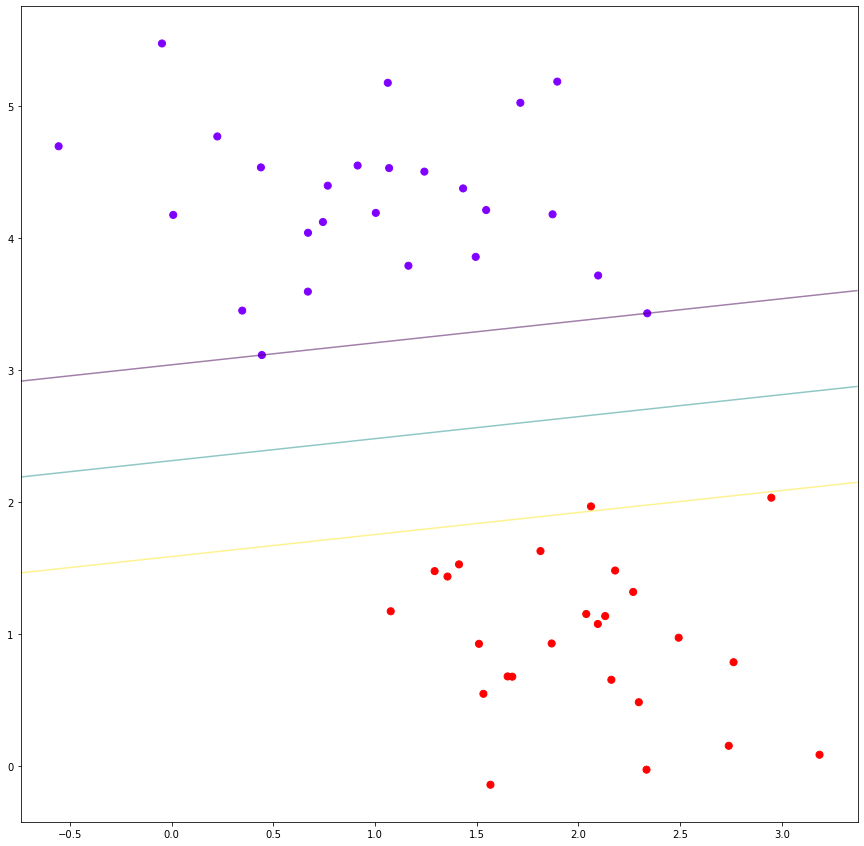

In [77]:
clf=SVC(kernel="linear").fit(X,Y)
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plot_svm_decision_function(clf,[-1,0,1],["--","-","--"])

In [81]:
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples
clf.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [82]:
#返回给定测试数据和标签的平均准确度
clf.score(X,Y)

1.0

In [83]:
#返回支持向量
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [84]:
#返回支持向量的个数
clf.n_support_

array([2, 1])

In [87]:
#三维的数据进行处理
from sklearn.datasets import make_circles
X,Y=make_circles(100,factor=0.1,noise=0.1)
Y.shape

(100,)

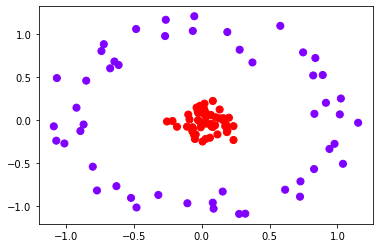

In [89]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plt.show()

In [102]:
#给非限制数据增加维度并绘制3D图像
r=np.exp(-(X**2).sum(1))
rlim=np.linspace(min(r),max(r),0.2)
from mpl_toolkits import mplot3d
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=Y):
    ax=plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap="rainbow")
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("%recall")
    plt.show()

SyntaxError: invalid character in identifier (<ipython-input-102-ac5e6fdda788>, line 9)